In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy.stats import norm
from scipy.ndimage import histogram

In [2]:
# import and check data
import pandas as pd
df = pd.read_csv('pendulumData.csv')
g = df['g (m/s2)'].to_numpy()
g_f = g[~ np.isnan(g)]
g_f = np.delete(g_f, 4)
print(g_f)
mean = np.mean(g_f)
print(mean)
samplestd = np.std(g_f, ddof=1)
print(samplestd)
N = len(g_f)
print(N)
meanstd = samplestd/(N**0.5)
print(meanstd)

[ 9.83    9.06    9.79    9.882   9.807   9.28    9.811   9.26    9.8095
  9.68    9.795   9.62    9.779  10.63    9.565   9.857   9.56    9.815
  9.8079  9.8     9.76    9.75    9.8608  9.8078  9.685  10.72    9.23
  9.933   9.766   9.79    9.7     9.7     9.1     9.7    11.      9.8
  9.7    10.3     9.77    9.3    10.5     9.05    9.779   9.821   9.78
  9.2    10.     10.1    10.19   12.22   10.176   9.67    9.7     8.68
  9.87    7.73    8.19    9.594   9.78   10.56    9.63    9.9     9.73
  8.8     9.1   ]
9.731707692307692
0.6041559658181437
65
0.07493632487074035


In [3]:
# bin data
mins = 7.6
maxs = 12.4
nbin = 24
binned = histogram(g_f, mins, maxs, nbin)
bins = [mins + (maxs - mins)/nbin * i for i in range(nbin + 1)]
print(binned)
# print(bins)

[ 1  0  1  0  0  1  1  4  5  3 22 16  4  1  2  2  0  1  0  0  0  0  0  1]


In [4]:
# clean data and remove bins with zero counts
nonzero = np.nonzero(binned)
counts = [binned[i] for i in nonzero[0]]
print(counts)
err = np.sqrt(counts)
print(err)
nonempty = [(bins[i] + bins[i+1])/2 for i in nonzero[0]]
print(nonempty)

[1, 1, 1, 1, 4, 5, 3, 22, 16, 4, 1, 2, 2, 1, 1]
[1.         1.         1.         1.         2.         2.23606798
 1.73205081 4.69041576 4.         2.         1.         1.41421356
 1.41421356 1.         1.        ]
[7.699999999999999, 8.1, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9, 10.1, 10.3, 10.5, 10.7, 11.1, 12.3]


In [37]:
import scipy.optimize as opt
popt, pcov = opt.curve_fit(f=gaussian, xdata=nonempty, ydata=counts, sigma=err, p0=[9.8,0.2,13], absolute_sigma=True)
print(popt)
print(np.sqrt([pcov[i][i] for i in range(len(popt))]))
chi2final = chi2(gaussian, popt, nonempty, counts, err)
print(chi2final)
dof = N - len(popt)
chi2red = chi2final/dof
print(chi2red)

[9.79468297 0.15860952 8.89954586]
[0.02409412 0.01930036 1.33413774]
20.50262692803742
0.3306875310973777


In [43]:
from scipy.stats import chi2
p = chi2.cdf(chi2final, dof)
print(p)

1.3552987984266052e-07


In [6]:
# gaussian
def gaussian(x, mu, sigma, a):
    return a/sigma/np.sqrt(2*np.pi) * np.exp(-(x-mu)**2/2/sigma**2)

In [ ]:
# cauchy

In [29]:
def chi2(f, popt, x, y, err):
    ev = f(x, *popt)
    return np.sum((y-ev)**2/err**2)

<Figure size 432x288 with 0 Axes>

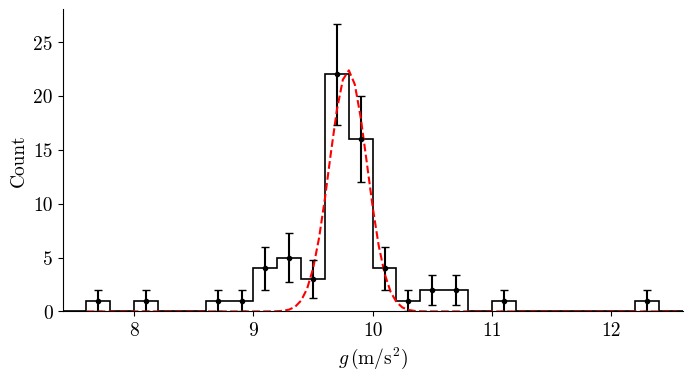

In [41]:
plt.clf()
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(g_f, bins=[7.399+0.2*i for i in range(27)], edgecolor='black', linewidth=1.2, color=(1,1,1,0), histtype='step')
#plt.bar(nonempty, counts, width=1, color=(1,1,1,0), yerr=err)
x = [7.6+0.05*i for i in range(100)]
plt.plot(x, gaussian(x, *popt), 'r--')
plt.errorbar(nonempty, counts, yerr=err, color='black', fmt='.', ecolor='black', capsize=3)
plt.xlabel(r'$g \, (\mathrm{m}/\mathrm{s}^2)$')
plt.ylabel('Count')
plt.xlim([7.4, 12.6])
# plt.title('Measured value of acceleration due to gravity')
# plt.text(11, 21, r'$\mu = 9.73$', horizontalalignment='left')
# plt.text(11, 18, r'$\sigma = 0.60$', horizontalalignment='left')
# plt.text(11, 15, r'$\sigma_\mu = 0.07$', horizontalalignment='left')
# plt.text(11, 12, r'$N = 65$', horizontalalignment='left')
fig.set_size_inches(8, 4)
fig.set_dpi(100)
plt.savefig('hist.png', bbox_inches='tight', pad_inches=0)